In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_266019row_cleaned.csv')
plt.rcParams['font.family'] = 'Heiti TC'

In [3]:
df.shape

(266019, 57)

In [4]:
# 列出物件型變數
object_cols = df.select_dtypes(include=[np.object_]).columns.tolist()
object_cols

['鄉鎮市區', '土地位置建物門牌', '交易年月日', '有無管理組織', '備註', '編號', '建築型態清整', 'Region', '屋齡區間']

In [5]:
df['有無管理組織'] = df['有無管理組織'].map({'有': 1, '無': 0})

In [6]:
object_cols = df.select_dtypes(include=[np.object_]).columns.tolist()
object_cols

['鄉鎮市區', '土地位置建物門牌', '交易年月日', '備註', '編號', '建築型態清整', 'Region', '屋齡區間']

In [7]:
# 列出物件型變數
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols

['建築完成年月',
 '建物移轉總面積平方公尺',
 '有無管理組織',
 '總價元',
 '單價元平方公尺',
 '緯度',
 '經度',
 'bad_count',
 'good_count',
 '陽台有無',
 '是否含額外土地',
 '建築型態_住商大樓',
 '建築型態_公寓',
 '建築型態_其他',
 '建築型態_透天厝',
 '房地總價元',
 '格局比例_房',
 '格局比例_廳',
 '格局比例_衛',
 '格局比例_隔間',
 '是否包含車位',
 '建材_磚石',
 '建材_鋼筋',
 '建材_鋼骨',
 '建材_竹木',
 '住',
 '商',
 '工',
 '農',
 '移轉層次_騎樓',
 '移轉層次_屋頂',
 '移轉層次_一二樓',
 'KDE_0.5km',
 'KDE_1km',
 'KDE_1.5km',
 '有無電梯',
 '建物移轉總面積坪',
 '單價元每坪',
 '房地總價元(坪)',
 '交易年份',
 '建築完成年',
 '交易年_民國',
 '屋齡',
 'good_count_0_500',
 'good_count_500_1000',
 'good_count_1000_1500',
 'bad_count_0_500',
 'bad_count_500_1000',
 'bad_count_1000_1500']

## 篩選出特殊交易

In [8]:
keywords = [
    "親友、員工或其他特殊關係間之交易",
    "含增建或未登記建物",
    "建商與地主合建案",
    "(包含)公共設施保留地之交易",
    "畸零地或有合併使用之交易",
    "向政府機關承購之案件",
    "受債權債務影響或債務抵償之交易",
    "急買急賣",
    "有民情風俗因素之交易",
    "單獨車位交易",
    "土地或建物分次登記案件",
    "瑕疵物件之交易",
    "塔位或墓園"
]

# 篩選異常交易
pattern = '|'.join(keywords)
abnormal_df = df[df['備註'].str.contains(pattern, na=False)]
print(len(abnormal_df))
# print(abnormal_df['備註'].tolist())

13320


In [9]:
df_cleaned = df.drop(abnormal_df.index)

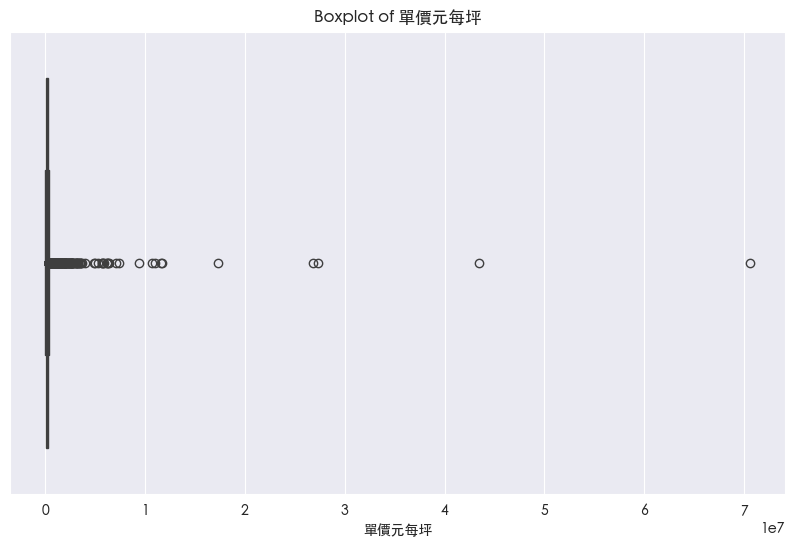

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['單價元每坪'])
plt.title('Boxplot of 單價元每坪')
plt.show()

## 篩選出單價元每坪的outlier

In [11]:
# 計算前 2.5% 和後 2.5% 的分位數值
lower_bound = df_cleaned['單價元每坪'].quantile(0.025)
upper_bound = df_cleaned['單價元每坪'].quantile(0.975)

# 篩選出前 2.5% 的資料
lower_2_5_percent = df_cleaned[df_cleaned['單價元每坪'] <= lower_bound]

# 篩選出後 2.5% 的資料
upper_2_5_percent = df_cleaned[df_cleaned['單價元每坪'] >= upper_bound]

# 顯示前後 2.5% 資料的數量
print(f"前 2.5% 的資料數量: {len(lower_2_5_percent)}")
print(f"後 2.5% 的資料數量: {len(upper_2_5_percent)}")
# 篩選出極端值
outliers_unitPrice = df_cleaned[(df_cleaned['單價元每坪'] < lower_bound) | (df_cleaned['單價元每坪'] > upper_bound)]

print(f"極端值數量: {len(outliers_unitPrice)}")

前 2.5% 的資料數量: 6318
後 2.5% 的資料數量: 6319
極端值數量: 12634


In [12]:
df_cleaned_2 = df_cleaned.drop(outliers_unitPrice.index)

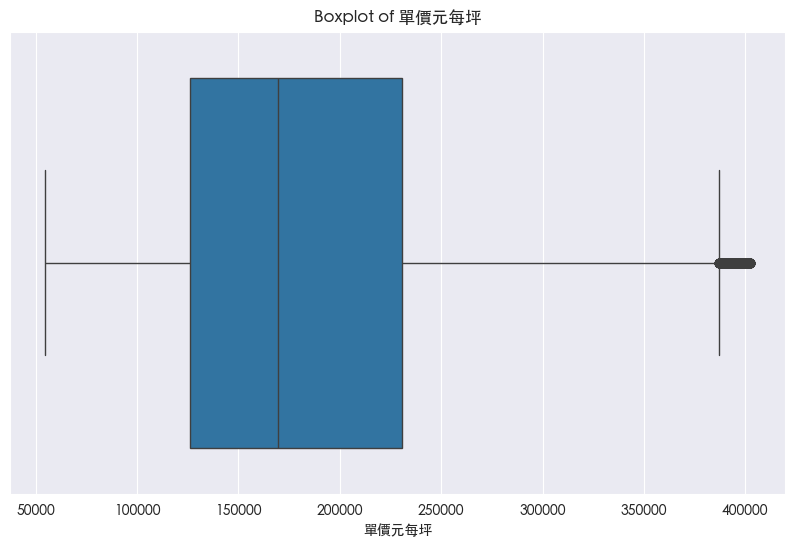

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned_2['單價元每坪'])
plt.title('Boxplot of 單價元每坪')
plt.show()

## 篩出格局比例的outlier

<Figure size 1000x600 with 0 Axes>

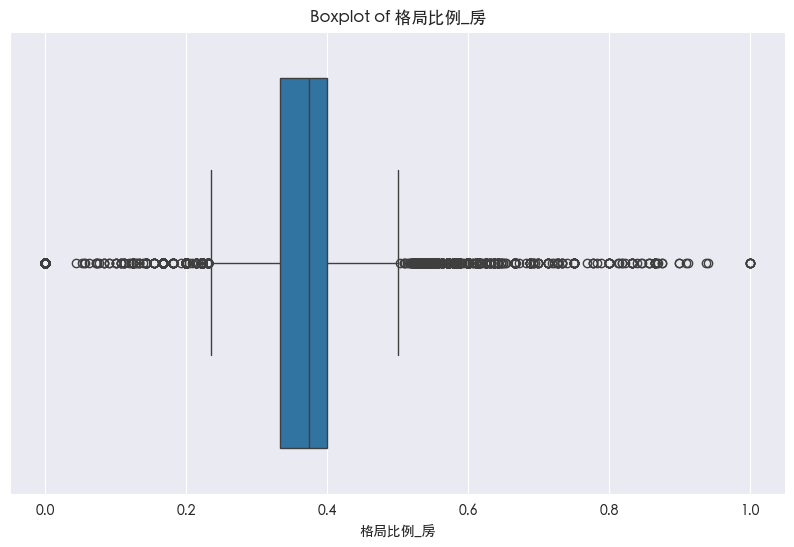

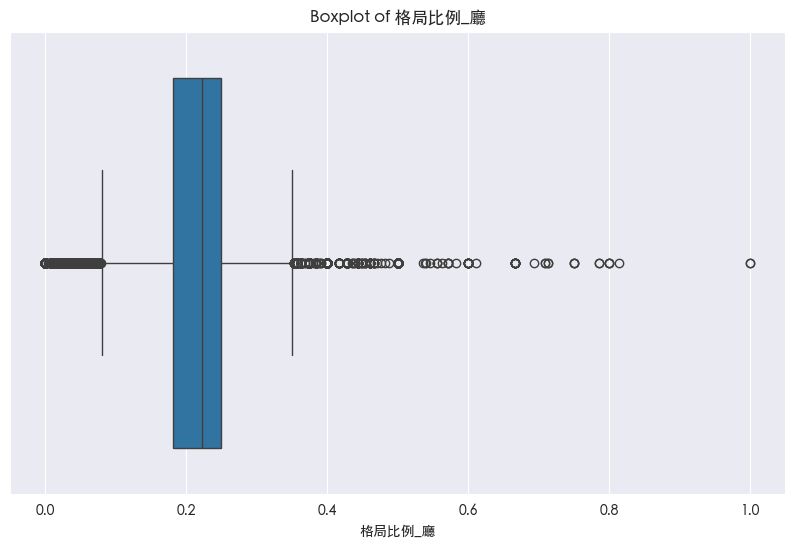

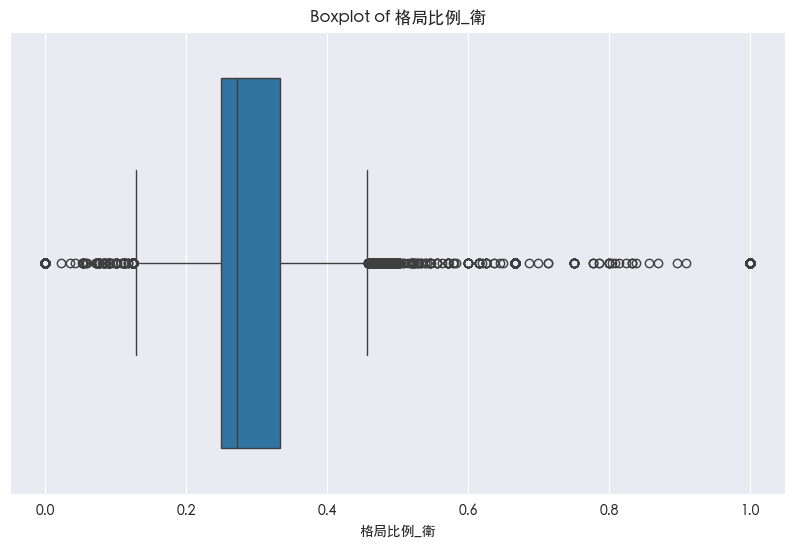

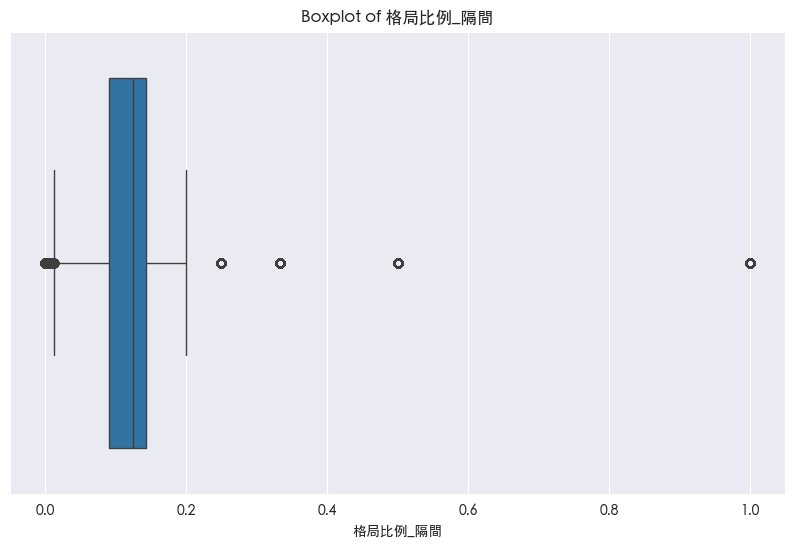

In [14]:
# 欄位名稱列表
columns = ['格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間']

# 設定圖形大小
plt.figure(figsize=(10, 6))

# 迴圈繪製每個欄位的 boxplot
for col in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_cleaned_2[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [15]:
# 計算前 2.5% 和後 2.5% 的分位數值
lower_bound_room = df_cleaned_2['格局比例_房'].quantile(0.025)
upper_bound_room = df_cleaned_2['格局比例_房'].quantile(0.975)

# 篩選出前 2.5% 的資料
lower_2_5_percent_room = df_cleaned_2[df_cleaned_2['格局比例_房'] <= lower_bound_room]

# 篩選出後 2.5% 的資料
upper_2_5_percent_room = df_cleaned_2[df_cleaned_2['格局比例_房'] >= upper_bound_room]

# 顯示前後 2.5% 資料的數量
print(f"前 2.5% 的資料數量: {len(lower_2_5_percent_room)}")
print(f"後 2.5% 的資料數量: {len(upper_2_5_percent_room)}")

# 篩選出極端值
outliers_room = df_cleaned_2[(df_cleaned_2['格局比例_房'] < lower_bound_room) | (df_cleaned_2['格局比例_房'] > upper_bound_room)]

print(f"極端值數量: {len(outliers_room)}")

前 2.5% 的資料數量: 12567
後 2.5% 的資料數量: 10108
極端值數量: 7194


In [16]:
# 計算前 2.5% 和後 2.5% 的分位數值
lower_bound_living = df_cleaned_2['格局比例_廳'].quantile(0.025)
upper_bound_living = df_cleaned_2['格局比例_廳'].quantile(0.975)

# 篩選出前 2.5% 的資料
lower_2_5_percent_living = df_cleaned_2[df_cleaned_2['格局比例_廳'] <= lower_bound_living]

# 篩選出後 2.5% 的資料
upper_2_5_percent_living = df_cleaned_2[df_cleaned_2['格局比例_廳'] >= upper_bound_living]

# 顯示前後 2.5% 資料的數量
print(f"前 2.5% 的資料數量: {len(lower_2_5_percent_living)}")
print(f"後 2.5% 的資料數量: {len(upper_2_5_percent_living)}")

# 篩選出極端值
outliers_living = df_cleaned_2[(df_cleaned_2['格局比例_廳'] < lower_bound_living) | (df_cleaned_2['格局比例_廳'] > upper_bound_living)]

print(f"極端值數量: {len(outliers_living)}")

前 2.5% 的資料數量: 9317
後 2.5% 的資料數量: 20182
極端值數量: 2425


In [17]:
# 計算前 2.5% 和後 2.5% 的分位數值
lower_bound_bath = df_cleaned_2['格局比例_衛'].quantile(0.025)
upper_bound_bath = df_cleaned_2['格局比例_衛'].quantile(0.975)

# 篩選出前 2.5% 的資料
lower_2_5_percent_bath = df_cleaned_2[df_cleaned_2['格局比例_衛'] <= lower_bound_bath]

# 篩選出後 2.5% 的資料
upper_2_5_percent_bath = df_cleaned_2[df_cleaned_2['格局比例_衛'] >= upper_bound_bath]

# 顯示前後 2.5% 資料的數量
print(f"前 2.5% 的資料數量: {len(lower_2_5_percent_bath)}")
print(f"後 2.5% 的資料數量: {len(upper_2_5_percent_bath)}")

# 篩選出極端值
outliers_bath = df_cleaned_2[(df_cleaned_2['格局比例_衛'] < lower_bound_bath) | (df_cleaned_2['格局比例_衛'] > upper_bound_bath)]

print(f"極端值數量: {len(outliers_bath)}")

前 2.5% 的資料數量: 22788
後 2.5% 的資料數量: 6187
極端值數量: 10725


In [18]:
# 計算前 2.5% 和後 2.5% 的分位數值
lower_bound_part = df_cleaned_2['格局比例_隔間'].quantile(0.025)
upper_bound_part = df_cleaned_2['格局比例_隔間'].quantile(0.975)

# 篩選出前 2.5% 的資料
lower_2_5_percent_part = df_cleaned_2[df_cleaned_2['格局比例_隔間'] <= lower_bound_part]

# 篩選出後 2.5% 的資料
upper_2_5_percent_part = df_cleaned_2[df_cleaned_2['格局比例_隔間'] >= upper_bound_part]

# 顯示前後 2.5% 資料的數量
print(f"前 2.5% 的資料數量: {len(lower_2_5_percent_part)}")
print(f"後 2.5% 的資料數量: {len(upper_2_5_percent_part)}")

# 篩選出極端值
outliers_part = df_cleaned_2[(df_cleaned_2['格局比例_隔間'] < lower_bound_part) | (df_cleaned_2['格局比例_隔間'] > upper_bound_part)]

print(f"極端值數量: {len(outliers_part)}")

前 2.5% 的資料數量: 8199
後 2.5% 的資料數量: 12871
極端值數量: 11490


In [19]:
# 取得所有異常值 DataFrame 的 index 的聯集
combined_layout_outliers_index = outliers_room.index.union(
    outliers_living.index
).union(
    outliers_bath.index
).union(
    outliers_part.index
)

print(f"極端值數量: {len(combined_layout_outliers_index)}")

極端值數量: 23761


In [20]:
df_cleaned_3 = df_cleaned_2.drop(combined_layout_outliers_index)

<Figure size 1000x600 with 0 Axes>

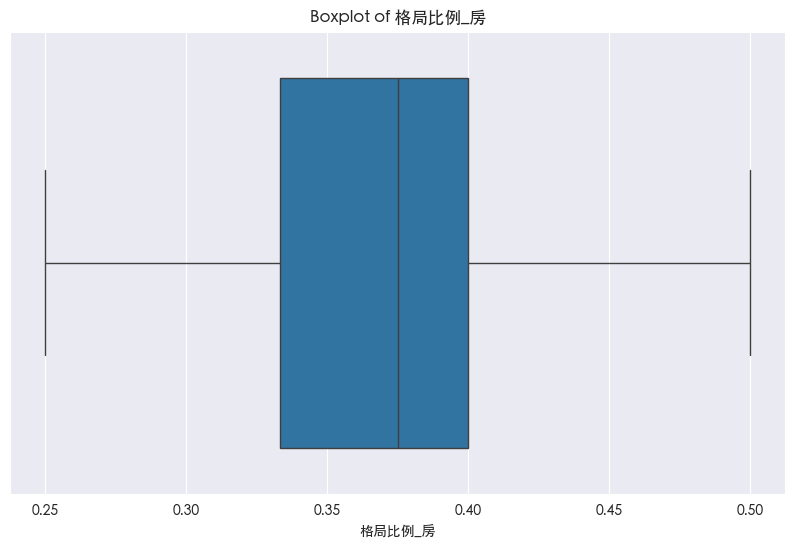

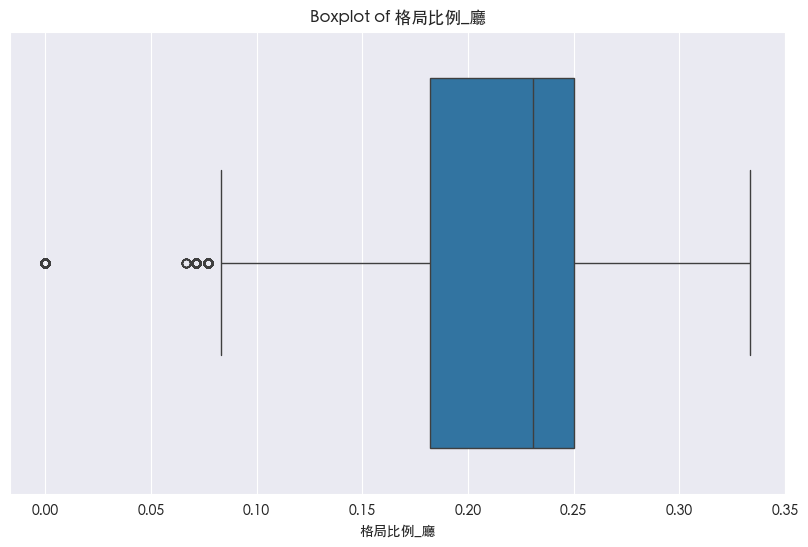

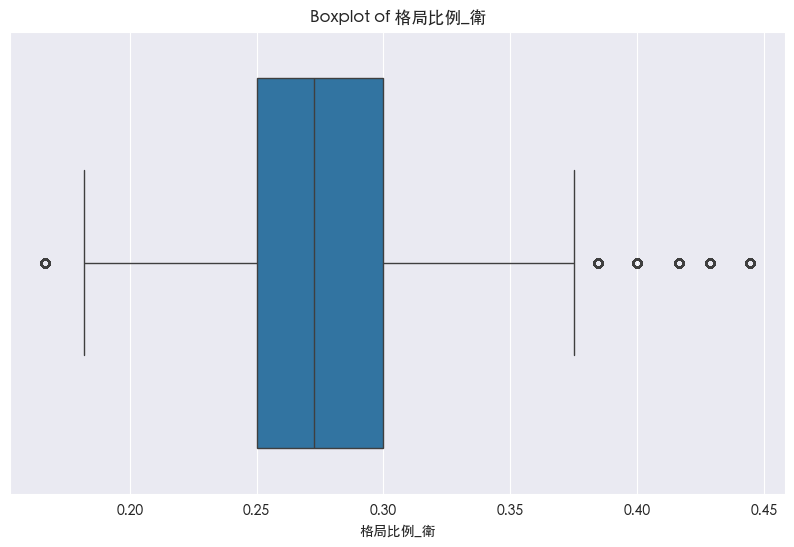

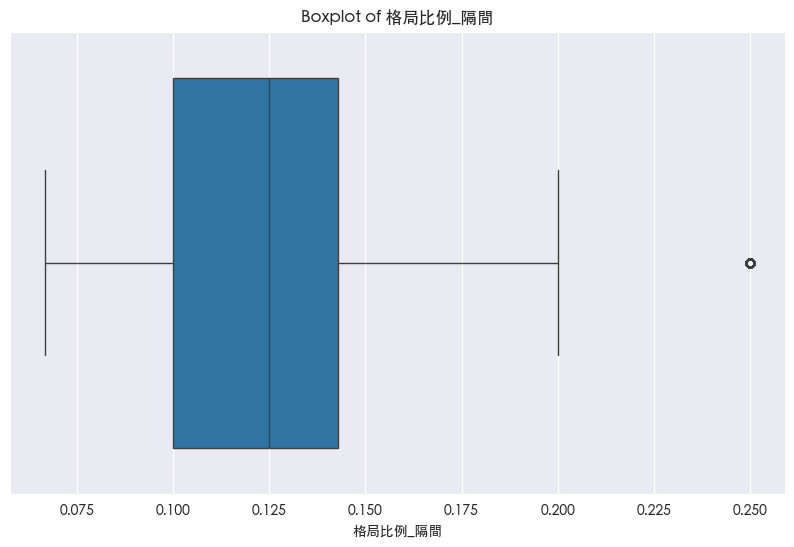

In [21]:
# 欄位名稱列表
columns = ['格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間']

# 設定圖形大小
plt.figure(figsize=(10, 6))

# 迴圈繪製每個欄位的 boxplot
for col in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_cleaned_3[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [22]:
# 假設欄位為 '格局比例_廳'
col = '格局比例_廳'

# 計算 Q1, Q3 和 IQR
Q1 = df_cleaned_3[col].quantile(0.25)
Q3 = df_cleaned_3[col].quantile(0.75)
IQR = Q3 - Q1

# 計算上下限
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 篩選離群值
outliers = df_cleaned_3[(df_cleaned_3[col] < lower_bound) | (df_cleaned_3[col] > upper_bound)]
print(outliers)


       鄉鎮市區                         土地位置建物門牌       交易年月日     建築完成年月  \
217     善化區                 臺南市善化區中正路１８８巷１１號  2022-08-22   700814.0   
228     永康區                  臺南市永康區中華路５８巷５６號  2022-07-01   951215.0   
685     新市區                臺南市新市區信義街１７８號一樓之３  2022-07-13  1040427.0   
705     中西區  臺南市中西區大勇街６２號八樓之１、八樓之２、八樓之３、八樓之４  2022-07-23   800426.0   
1067    永康區               臺南市永康區中正南路７４３巷８之１號  2019-01-09  1020417.0   
...     ...                              ...         ...        ...   
264776   東區                 臺南市東區崇德六街４７號七樓之２  2024-01-22   801226.0   
265036  關廟區                臺南市關廟區深坑里南雄路一段２６號  2024-01-27   740117.0   
265341  中西區  臺南市中西區大勇街６２號八樓之１、八樓之２、八樓之３、八樓之４  2024-01-31   800426.0   
265537  永康區        臺南市永康區大橋里大橋一街１０３巷６弄１之６號五樓  2024-02-03   790810.0   
265912  新市區                臺南市新市區綠園二街１０號七樓之１  2024-02-12  1050727.0   

        建物移轉總面積平方公尺  有無管理組織       總價元   單價元平方公尺  \
217           97.60       0   5000000   51230.0   
228          350.57       1  14222022   40568

In [23]:
# # 欲檢查的欄位列表
# columns = ['格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間']

# # 建立一個 DataFrame 複本來保存離群值標記
# df_outliers = df_cleaned_3.copy()

# # 迴圈處理每個欄位，計算 IQR 並標記離群值
# for col in columns:
#     # 計算 Q1, Q3 和 IQR
#     Q1 = df_outliers[col].quantile(0.25)
#     Q3 = df_outliers[col].quantile(0.75)
#     IQR = Q3 - Q1

#     # 計算上下限
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # 新增一個欄位來標記離群值 (True: 是離群值, False: 不是離群值)
#     df_outliers[f'{col}_outlier'] = (df_outliers[col] < lower_bound) | (df_outliers[col] > upper_bound)

# # 查看含有任一離群值的資料列
# outlier_rows = df_outliers[(df_outliers[[f'{col}_outlier' for col in columns]]).any(axis=1)]

# # 印出含有離群值的資料列
# print(outlier_rows)


In [24]:
df_cleaned_3 = df_cleaned_3.drop(outliers.index)

<Figure size 1000x600 with 0 Axes>

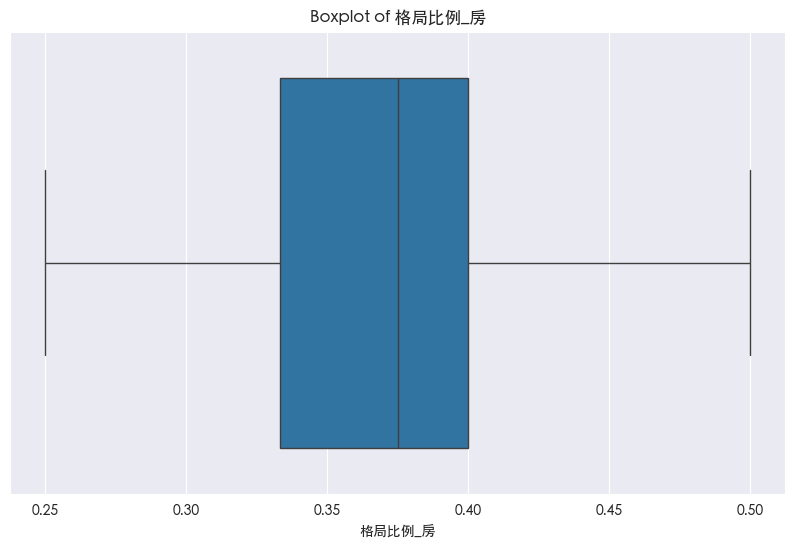

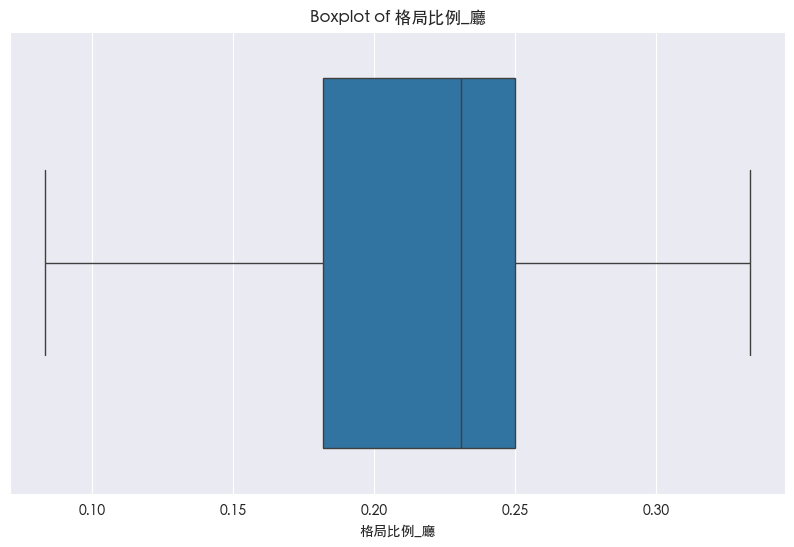

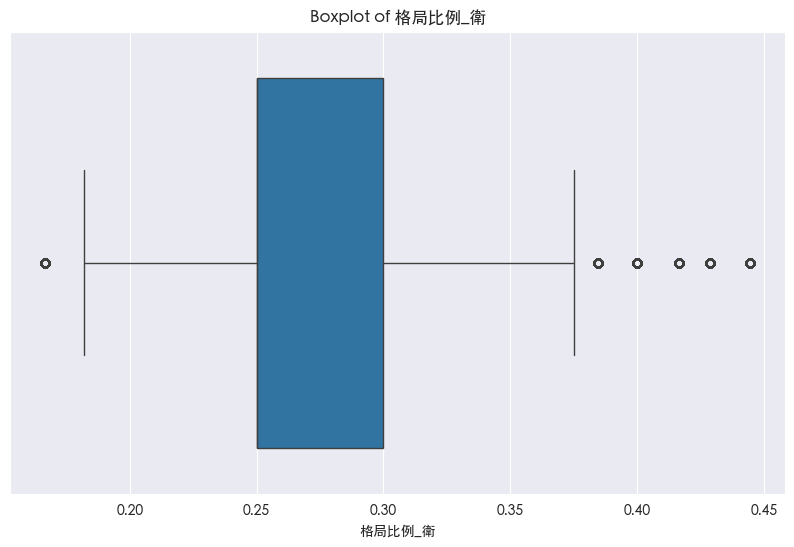

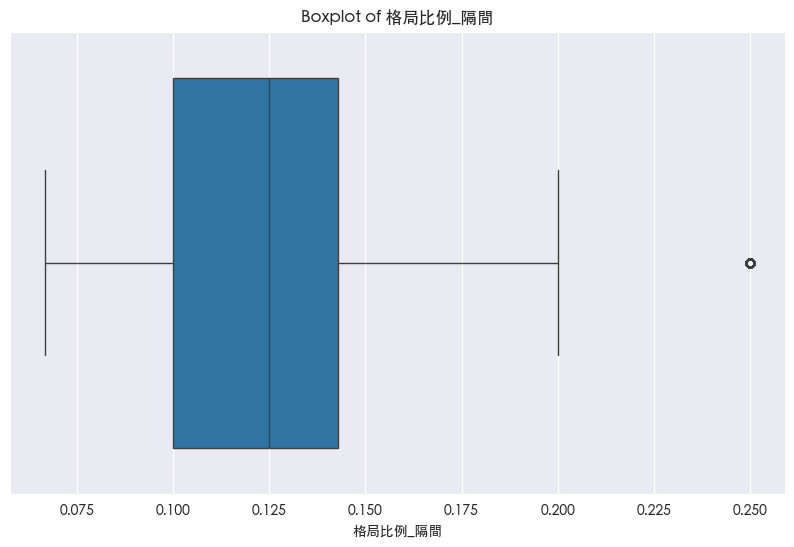

In [25]:
# 欄位名稱列表
columns = ['格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間']

# 設定圖形大小
plt.figure(figsize=(10, 6))

# 迴圈繪製每個欄位的 boxplot
for col in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_cleaned_3[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [26]:
# # 假設欄位為 '格局比例_衛'
# col = '格局比例_衛'

# # 計算 Q1, Q3 和 IQR
# Q1 = df_cleaned_3[col].quantile(0.25)
# Q3 = df_cleaned_3[col].quantile(0.75)
# IQR = Q3 - Q1

# # 計算下限 (lower bound)
# lower_bound = Q1 - 1.5 * IQR

# # 篩選低於下限的左側離群值
# left_outliers = df_cleaned_3[df_cleaned_3[col] < lower_bound]

# # 輸出左側離群值
# print(left_outliers)


In [27]:
# # 假設欄位為 '格局比例_隔間'
# col = '格局比例_隔間'

# # 計算 Q1, Q3 和 IQR
# Q1 = df_cleaned_3[col].quantile(0.25)
# Q3 = df_cleaned_3[col].quantile(0.75)
# IQR = Q3 - Q1

# # 計算上限 (upper bound)
# upper_bound = Q3 + 1.5 * IQR

# # 篩選高於上限的右側離群值
# right_outliers = df_cleaned_3[df_cleaned_3[col] > upper_bound]

# # 輸出右側離群值
# print(right_outliers)

In [28]:
# 假設 '格局比例_隔間' 欄位的離群值閾值為 0.2
col = '格局比例_隔間'
outlier_threshold = 0.2

# 排除大於等於 0.2 的離群值
df_cleaned_no_outliers = df_cleaned_3[df_cleaned_3[col] >= outlier_threshold]



In [29]:
df_cleaned_3 = df_cleaned_3.drop(df_cleaned_no_outliers.index)

<Figure size 1000x600 with 0 Axes>

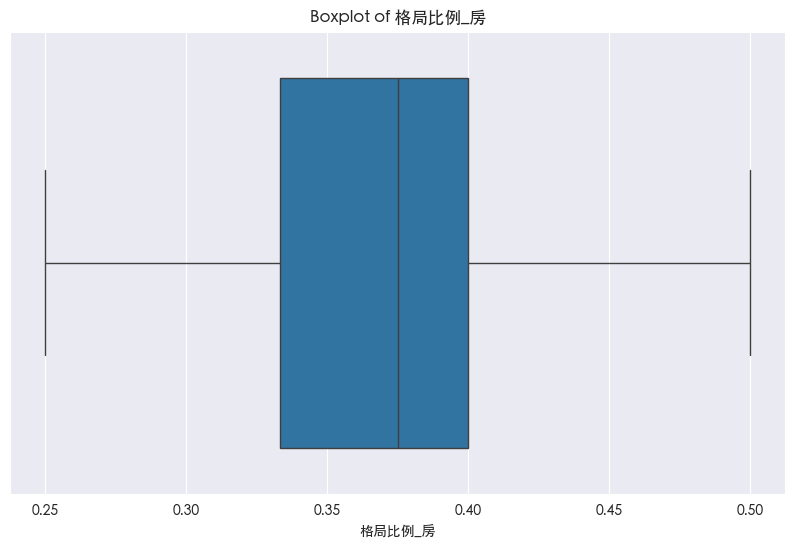

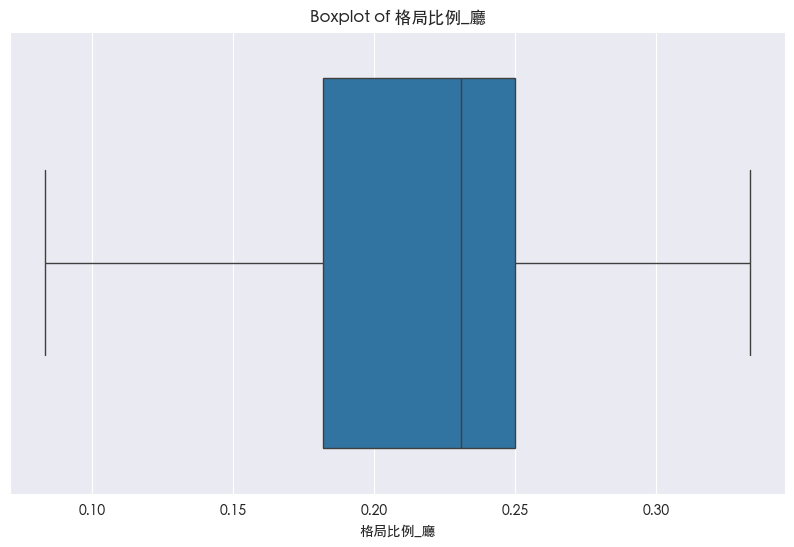

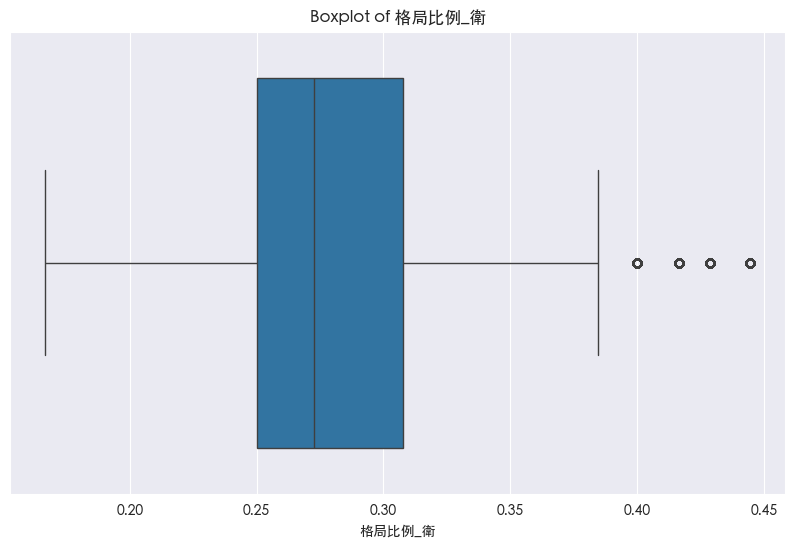

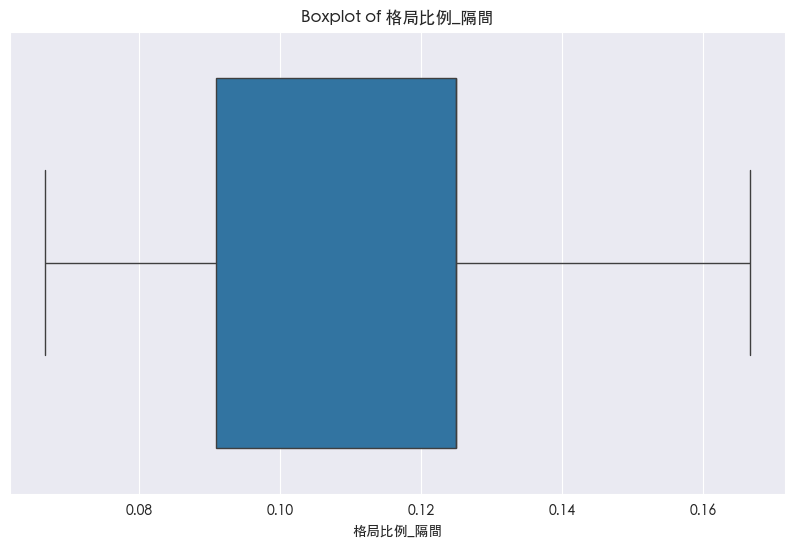

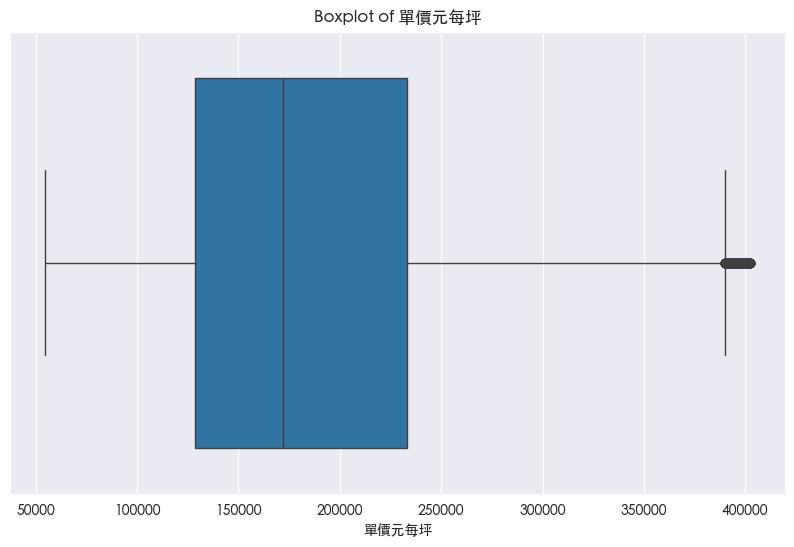

In [35]:
# 欄位名稱列表
columns = ['格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間','單價元每坪']

# 設定圖形大小
plt.figure(figsize=(10, 6))

# 迴圈繪製每個欄位的 boxplot
for col in columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_cleaned_3[col])
    plt.title(f'Boxplot of {col}(去掉outliers，5%)')
    plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_3['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單價元每坪(去掉outliers，5%)')
plt.show()

In [31]:
# # 假設 '格局比例_衛' 欄位的離群值閾值為 0.4
# col = '格局比例_衛'
# outlier_threshold = 0.4

# # 排除大於等於 0.4 的離群值
# df_bath_cleaned_no_outliers = df_cleaned_3[df_cleaned_3[col] > outlier_threshold]

In [32]:
# df_cleaned_3 = df_cleaned_3.drop(df_bath_cleaned_no_outliers.index)

In [ ]:
# # 欄位名稱列表
# columns = ['格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間']

# # 設定圖形大小
# plt.figure(figsize=(10, 6))

# # 迴圈繪製每個欄位的 boxplot
# for col in columns:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=df_cleaned_3[col])
#     plt.title(f'Boxplot of {col}')
#     plt.show()

In [34]:
df_cleaned_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201010 entries, 1 to 266018
Data columns (total 57 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  201010 non-null  object 
 1   土地位置建物門牌              201010 non-null  object 
 2   交易年月日                 201010 non-null  object 
 3   建築完成年月                173199 non-null  float64
 4   建物移轉總面積平方公尺           201010 non-null  float64
 5   有無管理組織                201010 non-null  int64  
 6   總價元                   201010 non-null  int64  
 7   單價元平方公尺               201010 non-null  float64
 8   備註                    53145 non-null   object 
 9   編號                    201010 non-null  object 
 10  緯度                    201010 non-null  float64
 11  經度                    201010 non-null  float64
 12  bad_count             201010 non-null  float64
 13  good_count            201010 non-null  float64
 14  建築型態清整                201010 non-null  object 
 15  陽台有無 

In [36]:
df_cleaned_3.to_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_201010row_outlier_final.csv',index=False)